# Problem showcasing

This file will showcase the issue encountered when combining the fixations and participants csv.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import cv2
from matplotlib import pyplot as plt
from random import choice
import numpy as np

The necessary paths and files are loaded for the rest of the code to work.


In [ ]:
pad = "../../data/csv/"
image_pad =  "../../data/Images/ROIs/"

participants = pd.read_csv(pad+"participants.csv")
fixations = pd.read_csv(pad+"fixations.csv")
ROI = pd.read_csv(pad + "ROIs.csv")

fix = fixations.merge(participants, how="left", on="Participant")
#remove fixations outside the screen
fix = fix[(fix["X"] > 0) & (fix["X"] < 1024) & (fix["Y"] > 0) & (fix["Y"] < 768)]
condition_to_remove = (fix["Image"] == 1) & (fix["Scene"] == 1) & (fix["X"] > 731)
filtered_fix = fix.loc[~condition_to_remove]

# Issue 1: incorrect sizing

The first issue that was encountered, was an incorrect sizing for one of the pictures. Scene 1, image 1 had a height of 1024 px. This resulted in the following error:


In [3]:
elsewhere = filtered_fix[(filtered_fix["Image"] == 1) &  (filtered_fix["Scene"] == 1) & (filtered_fix["Name"] == "Elsewhere")]

In [8]:
ROI = pd.read_csv(pad + "ROIs.csv")

img = cv2.imread(image_pad + "scene1_image1_original.png")
for idx, row in elsewhere.iterrows():
    img = cv2.circle(img, (int(row["X"]),int(row["Y"])), 5, (0,0,0), -1)
    xnew, ynew = int(row["Y"]+choice([-1,1])), int(row["Y"]+choice([-1,1]))
    [B,G,R] = img[ynew, xnew,:]
    this_ROI = ROI[(ROI["C1"] == R) & (ROI["C2"] == G) & (ROI["C3"] == B) & (ROI["Image"] == 1) &  (ROI["Scene"] == 2)]
    if len(this_ROI) > 0:
        this_name = this_ROI.iloc[0]["Name"]
        elsewhere.loc[idx, "Name"] = this_name
    
img = img[:,:,::-1]
plt.imshow(img)

IndexError: index 734 is out of bounds for axis 1 with size 728

# Issue 2: Error in the code.

The first issue we encounter is that this code is prone to selecting points outside of the image as you can see in the error below.


In [26]:
ROI = pd.read_csv(pad + "ROIs.csv")

img = cv2.imread(image_pad + "scene1_image1_cropped.png")
for idx, row in elsewhere.iterrows():
    img = cv2.circle(img, (int(row["X"]),int(row["Y"])), 5, (0,0,0), -1)
    xnew, ynew = int(row["Y"]+choice([-1,1])), int(row["Y"]+choice([-1,1]))
    [B,G,R] = img[ynew, xnew,:]
    this_ROI = ROI[(ROI["C1"] == R) & (ROI["C2"] == G) & (ROI["C3"] == B) & (ROI["Image"] == 1) &  (ROI["Scene"] == 2)]
    if len(this_ROI) > 0:
        this_name = this_ROI.iloc[0]["Name"]
        elsewhere.loc[idx, "Name"] = this_name
    
img = img[:,:,::-1]
plt.imshow(img)

IndexError: index 734 is out of bounds for axis 1 with size 731

## Solving issue 2

This error is fixed by offsetting the x and y if it is outside the picture.


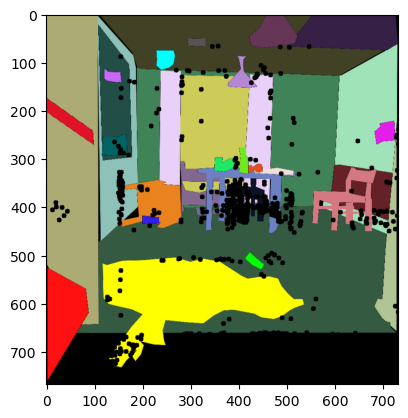

In [27]:
ROI = pd.read_csv(pad + "ROIs.csv")

img = cv2.imread(image_pad + "scene1_image1_cropped.png")
for idx, row in elsewhere.iterrows():
    img = cv2.circle(img, (int(row["X"]),int(row["Y"])), 5, (0,0,0), -1)
    xnew, ynew = int(row["Y"]+choice([-1,1])), int(row["Y"]+choice([-1,1]))
    if xnew >= len(img[1]):
        xnew = len(img[1]) - 5
    if ynew >= len(img):
        ynew = len(img) - 5
    [B,G,R] = img[ynew, xnew,:]
    this_ROI = ROI[(ROI["C1"] == R) & (ROI["C2"] == G) & (ROI["C3"] == B) & (ROI["Image"] == 1) &  (ROI["Scene"] == 2)]
    if len(this_ROI) > 0:
        this_name = this_ROI.iloc[0]["Name"]
        elsewhere.loc[idx, "Name"] = this_name
    
img = img[:,:,::-1]
plt.imshow(img)

In [4]:
ROI = pd.read_csv(pad + "ROIs.csv")

img = cv2.imread(image_pad + "scene2_image2_cropped.png")
for idx, row in elsewhere.iterrows():
    img = cv2.circle(img, (int(row["X"]),int(row["Y"])), 5, (0,0,0), -1)
    xnew, ynew = int(row["Y"]+choice([-1,1])), int(row["Y"]+choice([-1,1]))
    if xnew >= len(img[1]):
        xnew = len(img[1]) - 5
    if ynew >= len(img):
        ynew = len(img) - 5
    [B,G,R] = img[ynew, xnew,:]
    this_ROI = ROI[(ROI["C1"] == R) & (ROI["C2"] == G) & (ROI["C3"] == B) & (ROI["Image"] == 1) &  (ROI["Scene"] == 2)]
    if len(this_ROI) > 0:
        this_name = this_ROI.iloc[0]["Name"]
        elsewhere.loc[idx, "Name"] = this_name
    
img = img[:,:,::-1]
plt.imshow(img)

TypeError: 'NoneType' object is not subscriptable

# Issue 3: another error in the code

The next issue is a bit more subtle but I will show what is happening here. In the code, there is a new x and y selected, the problem is that the y is taken as starting point twice, instead of an x once and a y the second time. I will show the result of this by plotting three points. The red point is the original point, the blue point is the new x and y of the given code. The green point is the point after adapting the code.

I put the image in grayscale in order to make the points stand out more.


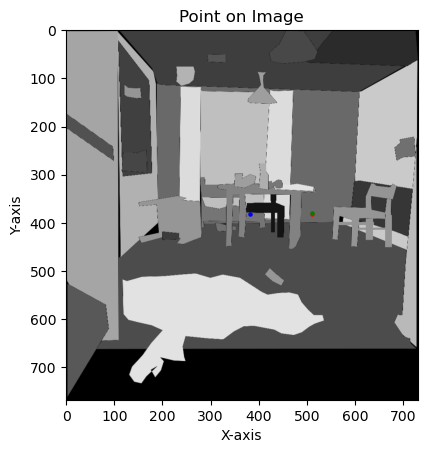

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

scene = 1
image = 1

# Load the image using PIL and convert it to grayscale
image_path = f'../data/csv/ROIs/scene{scene}_image{image}_cropped.png'  # Replace with your actual path
img = Image.open(image_path).convert('L')  # Convert to grayscale using 'L' mode
img = np.array(img)  # Convert the image to a numpy array

# Coordinates of the point you want to plot
x, y = 510.9, 381.0  # Replace with the desired coordinates
xnew, ynew = int(y+choice([-1,1])), int(y+choice([-1,1]))
xnew1, ynew1 = int(x+choice([-1,1])), int(y+choice([-1,1]))

# Plot the image
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.scatter([x], [y], color='red', marker='o', s=5)  # Plot the point
plt.scatter([xnew], [ynew], color='blue', marker='o', s=5)  # Plot the point
plt.scatter([xnew1], [ynew1], color='green', marker='o', s=5)  # Plot the point
plt.title('Point on Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Issue 4: unsegmented section

The next issue that needed to be tackled, is a piece of the floor that isn't segmented. To fix this, I used krita to paint the whole black part the same color as the rest of the floor, this gives us following image.


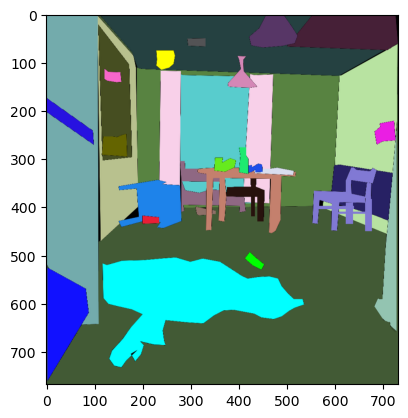

In [41]:
img = cv2.imread(image_pad + f'scene{scene}_image{image}.png')
plt.imshow(img)

# Issue 5: table segment not saved in ROI file

The last issue is in scene 1, image 2 where the table segment isn't saved in the ROIs, creating a lot of unnessary elsewheres. This was fixed by manually adding the segment to the csv.
